In [6]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)



%matplotlib inline

In [7]:
df = pd.read_csv('@OrthoClinicalDX_tweets.csv')
#df = df.reindex(np.random.permutation(df.index))
#df = df[['text', 'airline_sentiment']]

In [8]:
df.head()

,id,created_at,text
0,1107674341607653379,2019-03-18 16:05:17,"b""@michael_demeo_ Michael, we're happy to have..."
1,1107672913929490432,2019-03-18 15:59:36,b'https://t.co/QCMnh2HeqO #diagnostics #orthoc...
2,1106552666803429376,2019-03-15 13:48:09,b'https://t.co/8iot012Y7M'
3,1106544276589154305,2019-03-15 13:14:48,b'RT @HospitalHub: Ortho Clinical Diagnostics\...
4,1106182671514910721,2019-03-14 13:17:55,"b'Today\xe2\x80\x99s #WorldKidneyDay, and we\x..."


In [9]:
df.drop('id', axis=1, inplace=True)

In [10]:
df.head()

,created_at,text
0,2019-03-18 16:05:17,"b""@michael_demeo_ Michael, we're happy to have..."
1,2019-03-18 15:59:36,b'https://t.co/QCMnh2HeqO #diagnostics #orthoc...
2,2019-03-15 13:48:09,b'https://t.co/8iot012Y7M'
3,2019-03-15 13:14:48,b'RT @HospitalHub: Ortho Clinical Diagnostics\...
4,2019-03-14 13:17:55,"b'Today\xe2\x80\x99s #WorldKidneyDay, and we\x..."


In [7]:
df.drop('created_at', axis=1, inplace=True)

In [29]:
def find_keywords(word,text):
    word_lw=word.lower()
    text_lw=text.lower()
    match = re.search(word_lw,text_lw)
    if match:
        return True
    else:
        return False
        

In [30]:
df['relevant'] = df['text'].apply(lambda tweet: find_keywords('product', tweet) or find_keywords('service', tweet) or find_keywords('reviews',tweet) or find_keywords('customer',tweet))

In [31]:
df.head(20)

,id,created_at,text,Pdt_Text,relevant
0,1107674341607653379,2019-03-18 16:05:17,"b""@michael_demeo_ Michael, we're happy to have...",None,False
1,1107672913929490432,2019-03-18 15:59:36,b'https://t.co/QCMnh2HeqO #diagnostics #orthoc...,None,False
2,1106552666803429376,2019-03-15 13:48:09,b'https://t.co/8iot012Y7M',None,False
3,1106544276589154305,2019-03-15 13:14:48,b'RT @HospitalHub: Ortho Clinical Diagnostics\...,None,False
4,1106182671514910721,2019-03-14 13:17:55,"b'Today\xe2\x80\x99s #WorldKidneyDay, and we\x...",None,False
5,1106118138096222208,2019-03-14 09:01:29,b'RT @360DxNews: A test from @OrthoClinicalDX ...,None,False
6,1105819127200075777,2019-03-13 13:13:19,"b""Ortho's VITROS\xc2\xae XT MicroSlide Receive...",None,False
7,1103720646343839746,2019-03-07 18:14:42,b'Are you ready for #EUROMEDLAB? https://t.co/...,None,False
8,1102590901862453249,2019-03-04 15:25:30,b'RT @elhospital: #LaboratorioCl\xc3\xadnico L...,None,False
9,1100802276929822721,2019-02-27 16:58:09,b'Today we celebrate our wonderful long-time e...,None,False


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 5 columns):
id            465 non-null int64
created_at    465 non-null object
text          465 non-null object
Pdt_Text      0 non-null object
relevant      465 non-null bool
dtypes: bool(1), int64(1), object(3)
memory usage: 15.1+ KB


In [11]:
df.head()

,created_at,text
0,2019-03-18 16:05:17,"b""@michael_demeo_ Michael, we're happy to have..."
1,2019-03-18 15:59:36,b'https://t.co/QCMnh2HeqO #diagnostics #orthoc...
2,2019-03-15 13:48:09,b'https://t.co/8iot012Y7M'
3,2019-03-15 13:14:48,b'RT @HospitalHub: Ortho Clinical Diagnostics\...
4,2019-03-14 13:17:55,"b'Today\xe2\x80\x99s #WorldKidneyDay, and we\x..."


In [12]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

In [13]:
# remove twitter handles (@user)
df['tidy_text'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")

In [14]:
df.head()

,created_at,text,tidy_text
0,2019-03-18 16:05:17,"b""@michael_demeo_ Michael, we're happy to have...","b"" Michael, we're happy to have you. Welcome ..."
1,2019-03-18 15:59:36,b'https://t.co/QCMnh2HeqO #diagnostics #orthoc...,b'https://t.co/QCMnh2HeqO #diagnostics #orthoc...
2,2019-03-15 13:48:09,b'https://t.co/8iot012Y7M',b'https://t.co/8iot012Y7M'
3,2019-03-15 13:14:48,b'RT @HospitalHub: Ortho Clinical Diagnostics\...,b'RT : Ortho Clinical Diagnostics\xe2\x80\x99 ...
4,2019-03-14 13:17:55,"b'Today\xe2\x80\x99s #WorldKidneyDay, and we\x...","b'Today\xe2\x80\x99s #WorldKidneyDay, and we\x..."


In [15]:
from sklearn.base import BaseEstimator, TransformerMixin

In [16]:
from nltk.stem.porter import *
from nltk.corpus import stopwords

In [17]:
class CleanText(BaseEstimator, TransformerMixin):
    def remove_mentions(self, input_text):
        return re.sub(r'@\w+', '', input_text)
    
    def remove_urls(self, input_text):
        return re.sub(r'http.?://[^\s]+[\s]?', '', input_text)
    
    def emoji_oneword(self, input_text):
        # By compressing the underscore, the emoji is kept as one word
        return input_text.replace('_','')
    
    def remove_punctuation(self, input_text):
        # Make translation table
        punct = string.punctuation
        trantab = str.maketrans(punct, len(punct)*' ')  # Every punctuation symbol will be replaced by a space
        return input_text.translate(trantab)
    def remove_digits(self, input_text):
        return re.sub('\d+', '', input_text)
    
    def to_lower(self, input_text):
        return input_text.lower()
    
    def remove_stopwords(self, input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words) 
    
    def stemming(self, input_text):
        porter = PorterStemmer()
        words = input_text.split() 
        stemmed_words = [porter.stem(word) for word in words]
        return " ".join(stemmed_words)
    
    def fit(self, X, y=None, **fit_params):
        return self
    
    def transform(self, X, **transform_params):
        clean_X = X.apply(self.remove_urls).apply(self.remove_punctuation).apply(self.remove_digits).apply(self.to_lower).apply(self.remove_stopwords)
        return clean_X

In [18]:
ct = CleanText()
df['tidytext'] = ct.fit_transform(df['tidy_text'])
df.head()

,created_at,text,tidy_text,tidytext
0,2019-03-18 16:05:17,"b""@michael_demeo_ Michael, we're happy to have...","b"" Michael, we're happy to have you. Welcome ...",michael happy welcome aboard thanks much shout
1,2019-03-18 15:59:36,b'https://t.co/QCMnh2HeqO #diagnostics #orthoc...,b'https://t.co/QCMnh2HeqO #diagnostics #orthoc...,diagnostics orthoclinicaldx
2,2019-03-15 13:48:09,b'https://t.co/8iot012Y7M',b'https://t.co/8iot012Y7M',
3,2019-03-15 13:14:48,b'RT @HospitalHub: Ortho Clinical Diagnostics\...,b'RT : Ortho Clinical Diagnostics\xe2\x80\x99 ...,rt ortho clinical diagnostics xe vitros xc xae...
4,2019-03-14 13:17:55,"b'Today\xe2\x80\x99s #WorldKidneyDay, and we\x...","b'Today\xe2\x80\x99s #WorldKidneyDay, and we\x...",today xe xs worldkidneyday xe xre proud offer ...


In [19]:
df['tidytext'] = df['tidytext'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [20]:
df.head()

,created_at,text,tidy_text,tidytext
0,2019-03-18 16:05:17,"b""@michael_demeo_ Michael, we're happy to have...","b"" Michael, we're happy to have you. Welcome ...",michael happy welcome aboard thanks much shout
1,2019-03-18 15:59:36,b'https://t.co/QCMnh2HeqO #diagnostics #orthoc...,b'https://t.co/QCMnh2HeqO #diagnostics #orthoc...,diagnostics orthoclinicaldx
2,2019-03-15 13:48:09,b'https://t.co/8iot012Y7M',b'https://t.co/8iot012Y7M',
3,2019-03-15 13:14:48,b'RT @HospitalHub: Ortho Clinical Diagnostics\...,b'RT : Ortho Clinical Diagnostics\xe2\x80\x99 ...,ortho clinical diagnostics vitros microslide r...
4,2019-03-14 13:17:55,"b'Today\xe2\x80\x99s #WorldKidneyDay, and we\x...","b'Today\xe2\x80\x99s #WorldKidneyDay, and we\x...",today worldkidneyday proud offer solutions pro...


In [18]:
tokenized_tweet = df['tidytext'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [michael, happy, welcome, aboard, thanks, much...
1                       [diagnostics, orthoclinicaldx]
2                                                   []
3    [ortho, clinical, diagnostics, vitros, microsl...
4    [today, worldkidneyday, proud, offer, solution...
Name: tidytext, dtype: object

In [19]:
print(len(tokenized_tweet))

465


In [21]:
from textblob import TextBlob 

In [36]:
def clean_tweet(tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split()) 

def get_tweet_sentiment(tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        if(tweet != ""):
            # create TextBlob object of passed tweet text 
            analysis = TextBlob(clean_tweet(tweet)) 
            # set sentiment 
            if analysis.sentiment.polarity > 0: 
                return 'positive'
            elif analysis.sentiment.polarity == 0: 
                return 'neutral'
            else: 
                return 'negative'

In [37]:
df['Sentiment'] = df['text'].apply(lambda x: get_tweet_sentiment(x))

In [38]:
df.head(20)

,created_at,text,tidy_text,tidytext,Sentiment
0,2019-03-18 16:05:17,"b""@michael_demeo_ Michael, we're happy to have...","b"" Michael, we're happy to have you. Welcome ...",michael happy welcome aboard thanks much shout,positive
1,2019-03-18 15:59:36,b'https://t.co/QCMnh2HeqO #diagnostics #orthoc...,b'https://t.co/QCMnh2HeqO #diagnostics #orthoc...,diagnostics orthoclinicaldx,neutral
2,2019-03-15 13:48:09,b'https://t.co/8iot012Y7M',b'https://t.co/8iot012Y7M',,neutral
3,2019-03-15 13:14:48,b'RT @HospitalHub: Ortho Clinical Diagnostics\...,b'RT : Ortho Clinical Diagnostics\xe2\x80\x99 ...,ortho clinical diagnostics vitros microslide r...,neutral
4,2019-03-14 13:17:55,"b'Today\xe2\x80\x99s #WorldKidneyDay, and we\x...","b'Today\xe2\x80\x99s #WorldKidneyDay, and we\x...",today worldkidneyday proud offer solutions pro...,positive
5,2019-03-14 09:01:29,b'RT @360DxNews: A test from @OrthoClinicalDX ...,b'RT : A test from that allows labs to run tw...,test allows labs commonly ordered tests simult...,negative
6,2019-03-13 13:13:19,"b""Ortho's VITROS\xc2\xae XT MicroSlide Receive...","b""Ortho's VITROS\xc2\xae XT MicroSlide Receive...",ortho vitros microslide receives mark submitte...,positive
7,2019-03-07 18:14:42,b'Are you ready for #EUROMEDLAB? https://t.co/...,b'Are you ready for #EUROMEDLAB? https://t.co/...,ready euromedlab,positive
8,2019-03-04 15:25:30,b'RT @elhospital: #LaboratorioCl\xc3\xadnico L...,b'RT : #LaboratorioCl\xc3\xadnico La Cl\xc3\xa...,laboratoriocl xadnico xadnica rosario medell x...,neutral
9,2019-02-27 16:58:09,b'Today we celebrate our wonderful long-time e...,b'Today we celebrate our wonderful long-time e...,today celebrate wonderful long time employee e...,positive


In [39]:
ptweets=0
ntweets=0
nutweets=0
for index,row in df.iterrows():
    if row['Sentiment']== "positive":
        ptweets=ptweets+1
    if row['Sentiment']== "negative":
        ntweets=ntweets+1
    if row['Sentiment']== "neutral":
        nutweets=nutweets+1
   
print('Ptweets count=',ptweets)
print('Ntweets count=',ntweets)
print('Nuweets count=',nutweets)

Ptweets count= 222
Ntweets count= 14
Nuweets count= 229


In [45]:
total_count=df.shape[0]
total_count

465

In [46]:
# percentage of positive tweets
print("Positive tweets percentage: {} %".format(100*ptweets/total_count)) 


# percentage of negative tweets 
print("Negative tweets percentage: {} %".format(100*ntweets/total_count)) 
 

Positive tweets percentage: 47.74193548387097 %
Negative tweets percentage: 3.010752688172043 %


In [20]:
from wordcloud import WordCloud

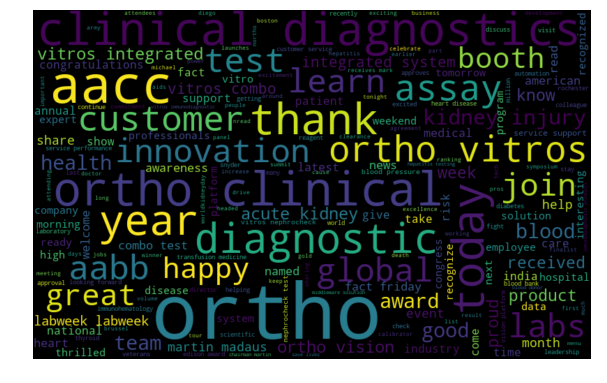

In [21]:
all_words = ' '.join([text for text in df['tidytext']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [22]:
wordcloud.to_file("Ortho_twitter.png")

In [23]:
print(len(all_words))

28229


In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=0.01)

In [26]:
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df['tidytext'])

In [27]:
print(bow)

  (0, 117)	1
  (0, 128)	1
  (0, 44)	1
  (1, 27)	1
  (3, 71)	1
  (3, 95)	1
  (3, 125)	1
  (3, 17)	1
  (3, 84)	1
  (3, 27)	1
  (4, 7)	1
  (4, 91)	1
  (4, 120)	1
  (5, 94)	1
  (5, 115)	1
  (5, 62)	1
  (5, 113)	1
  (6, 113)	1
  (6, 71)	1
  (6, 95)	1
  (6, 125)	1
  (6, 84)	1
  (7, 93)	1
  (9, 108)	1
  (9, 119)	1
  :	:
  (457, 12)	1
  (458, 73)	1
  (459, 73)	1
  (459, 17)	1
  (460, 66)	1
  (461, 25)	1
  (461, 86)	1
  (461, 109)	1
  (462, 55)	1
  (462, 53)	1
  (462, 123)	1
  (462, 9)	1
  (462, 95)	1
  (462, 84)	1
  (463, 55)	1
  (463, 130)	1
  (463, 17)	1
  (463, 84)	1
  (463, 27)	1
  (464, 18)	1
  (464, 113)	1
  (464, 71)	1
  (464, 95)	1
  (464, 125)	1
  (464, 84)	1


In [28]:
print(bow.shape)

(465, 132)


In [29]:
print(bow_vectorizer.get_feature_names()[130])

year


In [30]:
bow_transformer = CountVectorizer(max_df=0.90, min_df=0.01).fit(df['tidytext'])

In [31]:
print(bow_transformer.vocabulary_)

{'happy': 44, 'welcome': 128, 'thanks': 117, 'diagnostics': 27, 'ortho': 84, 'clinical': 17, 'vitros': 125, 'receives': 95, 'mark': 71, 'today': 120, 'proud': 91, 'assays': 7, 'test': 113, 'labs': 62, 'tests': 115, 'received': 94, 'ready': 93, 'time': 119, 'stay': 108, 'care': 14, 'team': 112, 'award': 9, 'customer': 23, 'service': 102, 'support': 109, 'good': 42, 'know': 60, 'next': 83, 'latest': 65, 'snyder': 105, 'laboratory': 61, 'global': 41, 'learn': 67, 'fact': 36, 'great': 43, 'event': 32, 'last': 64, 'join': 58, 'named': 79, 'chairman': 15, 'solution': 106, 'professionals': 90, 'india': 52, 'integrated': 56, 'system': 110, 'read': 92, 'check': 16, 'director': 28, 'years': 131, 'friday': 39, 'year': 130, 'helping': 48, 'blood': 12, 'awareness': 11, 'month': 77, 'disease': 30, 'million': 76, 'many': 70, 'health': 45, 'martin': 72, 'madaus': 69, 'company': 20, 'transfusion': 122, 'medicine': 74, 'experts': 35, 'news': 82, 'vision': 123, 'help': 47, 'product': 88, 'combo': 18, 'ac

In [32]:
print(len(bow_transformer.vocabulary_))

132


In [33]:
bag_of_words=[]
for i in bow_transformer.vocabulary_:
    bag_of_words.append(i)

In [34]:
all_bow = ' '.join([text for text in bag_of_words])
all_bow

'happy welcome thanks diagnostics ortho clinical vitros receives mark today proud assays test labs tests received ready time stay care team award customer service support good know next latest snyder laboratory global learn fact great event last join named chairman solution professionals india integrated system read check director years friday year helping blood awareness month disease million many health martin madaus company transfusion medicine experts news vision help product combo acute getting approves recently medical nephrocheck world leadership congratulations products looking weekend diagnostic platform high week thank thrilled forward interesting take excellence rochester aabb middleware morning data industry excited show customers visit booth come american annual discuss heart assay automation congress tomorrow fight national recognized aacc awards speaks performance scientific hepatitis testing kidney injury risk recognize labweek edison innovation share pressure immunohem

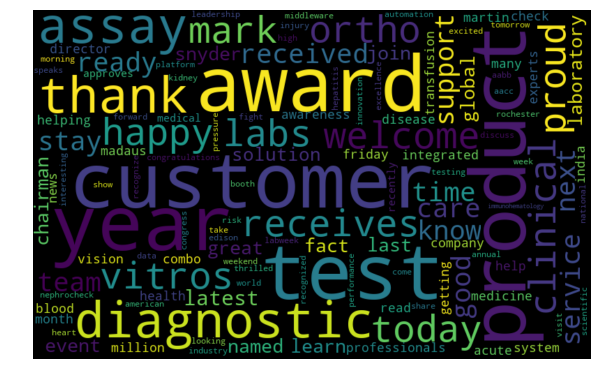

In [35]:
bowcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_bow)

plt.figure(figsize=(10, 7))
plt.imshow(bowcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [36]:
bowcloud.to_file("Orth_bow.png")